In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../../data/processed/cleaned_music_population.csv')
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [3]:
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot.shape, df.shape

((45020, 31), (45020, 13))

Recordar utilizar varibles con one hot emcoding para ver si los modelos mejoran.

In [4]:
X = df_onehot.drop(columns=['popularity'])
y = df_onehot['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [5]:
df_results = X_test.copy()
df_results['popularity_real'] = y_test
df_results['popularity_pred'] = y_pred.round(2)

df_results.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,...,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_real,popularity_pred
6787,0.007390,0.607,0.6670,0.000338,0.1830,-6.866,0.0429,91.980,0.3740,False,...,False,False,False,False,False,False,False,False,28.0,25.65
15452,0.000033,0.553,0.9630,0.010800,0.0357,-5.286,0.1170,95.015,0.5230,False,...,False,False,False,False,False,False,False,False,43.0,51.16
37719,0.980000,0.351,0.0664,0.938000,0.0903,-23.085,0.0391,116.413,0.0611,False,...,False,True,False,False,False,False,False,False,27.0,28.67
32320,0.289000,0.201,0.3420,0.000000,0.0951,-7.137,0.0308,139.319,0.0600,True,...,False,False,False,False,False,False,False,True,60.0,59.30
27949,0.327000,0.505,0.7410,0.000000,0.2410,-9.906,0.1430,94.188,0.9160,False,...,True,False,False,False,False,False,False,False,30.0,34.15
12788,0.030400,0.793,0.8680,0.009610,0.0850,-4.001,0.1730,124.985,0.8500,False,...,False,False,False,False,False,True,False,False,40.0,42.37
27678,0.557000,0.512,0.8330,0.000030,0.3100,-8.697,0.0448,101.188,0.5190,False,...,True,False,False,False,False,False,False,False,51.0,35.23
4269,0.131000,0.522,0.8600,0.020900,0.1220,-3.773,0.1450,128.019,0.2590,True,...,False,False,False,True,False,False,False,False,47.0,38.79
34650,0.069800,0.402,0.7590,0.000000,0.1930,-7.685,0.1340,88.085,0.5790,True,...,False,False,False,False,False,False,False,True,53.0,58.91
37445,0.980000,0.285,0.0227,0.146000,0.1170,-27.431,0.0556,79.856,0.2060,False,...,False,True,False,False,False,False,False,False,57.0,29.03


In [6]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

for idx, col_name in enumerate(X.columns):
    print(f'Coefficient for {col_name}: {model.coef_[idx]}')

Intercept: 44.260661928031986
Coefficients: [-1.11976601e-01  2.39243417e-01  1.27229510e-02 -4.62430081e-01
 -7.70903924e-01  8.80771265e-01 -5.31996762e-01 -7.79200143e-02
 -7.31469651e-02 -5.88789777e-02  3.78424696e-02  1.54352469e-02
  9.38057102e-02  4.11209498e-02 -3.13540876e-03  6.57789234e-03
  6.96558280e-03  6.62430660e-02  2.72556197e-03  1.58063095e-01
  1.78720314e-01 -7.66546082e+00 -4.40466059e+00 -5.36354693e+00
 -1.31396879e+00 -3.52033646e+00  2.51726160e+00 -2.55999446e+00
  3.14254068e+00  2.77970602e+00]
Coefficient for acousticness: -0.11197660097060816
Coefficient for danceability: 0.23924341737403942
Coefficient for energy: 0.012722951012629213
Coefficient for instrumentalness: -0.4624300805244745
Coefficient for liveness: -0.7709039241911924
Coefficient for loudness: 0.8807712645559811
Coefficient for speechiness: -0.5319967621684808
Coefficient for tempo: -0.0779200142751369
Coefficient for valence: -0.07314696512864294
Coefficient for key_A#: -0.05887897768

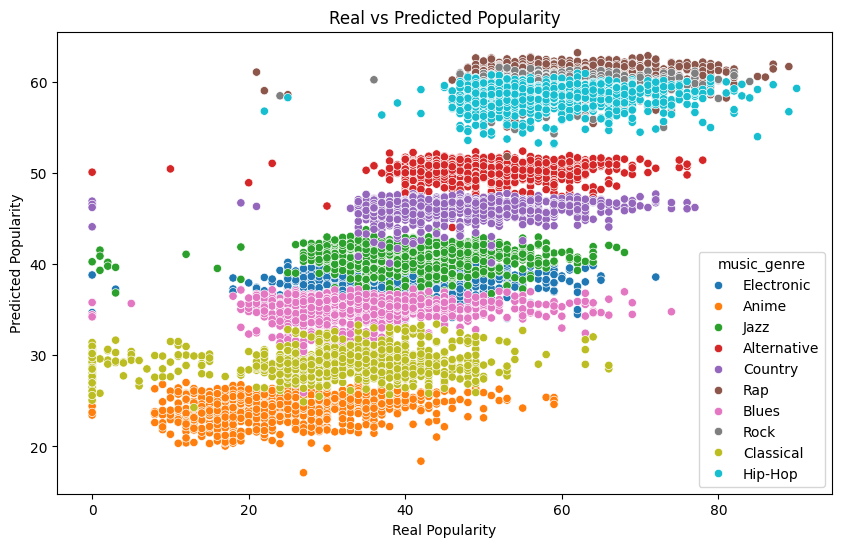

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity_real', y='popularity_pred', data=df_results, hue=df['music_genre'])
plt.title('Real vs Predicted Popularity')
plt.xlabel('Real Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rsme = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rsme}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 87.76772153119848
Root Mean Squared Error: 9.368442855202698
R-squared: 0.6352967406939756
Mean Absolute Error: 7.0857267837158044


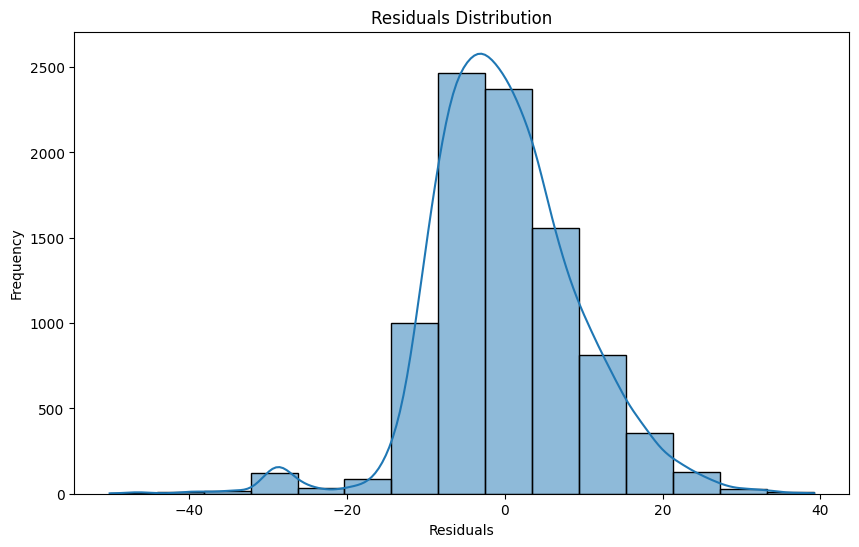

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

In [11]:
df_results_tree = X_test.copy()
df_results_tree['popularity_real'] = y_test
df_results_tree['popularity_pred'] = y_pred_dt.round(2)

df_results_tree.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,...,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_real,popularity_pred
6787,0.007390,0.607,0.6670,0.000338,0.1830,-6.866,0.0429,91.980,0.3740,False,...,False,False,False,False,False,False,False,False,28.0,14.0
15452,0.000033,0.553,0.9630,0.010800,0.0357,-5.286,0.1170,95.015,0.5230,False,...,False,False,False,False,False,False,False,False,43.0,40.0
37719,0.980000,0.351,0.0664,0.938000,0.0903,-23.085,0.0391,116.413,0.0611,False,...,False,True,False,False,False,False,False,False,27.0,39.0
32320,0.289000,0.201,0.3420,0.000000,0.0951,-7.137,0.0308,139.319,0.0600,True,...,False,False,False,False,False,False,False,True,60.0,51.0
27949,0.327000,0.505,0.7410,0.000000,0.2410,-9.906,0.1430,94.188,0.9160,False,...,True,False,False,False,False,False,False,False,30.0,47.0
12788,0.030400,0.793,0.8680,0.009610,0.0850,-4.001,0.1730,124.985,0.8500,False,...,False,False,False,False,False,True,False,False,40.0,33.0
27678,0.557000,0.512,0.8330,0.000030,0.3100,-8.697,0.0448,101.188,0.5190,False,...,True,False,False,False,False,False,False,False,51.0,35.0
4269,0.131000,0.522,0.8600,0.020900,0.1220,-3.773,0.1450,128.019,0.2590,True,...,False,False,False,True,False,False,False,False,47.0,35.0
34650,0.069800,0.402,0.7590,0.000000,0.1930,-7.685,0.1340,88.085,0.5790,True,...,False,False,False,False,False,False,False,True,53.0,52.0
37445,0.980000,0.285,0.0227,0.146000,0.1170,-27.431,0.0556,79.856,0.2060,False,...,False,True,False,False,False,False,False,False,57.0,18.0


En este caso tenemos un peor desempeño para los arboles de decision, deberiamos cambiar parametros para ver si mejora

In [12]:
mse_tree = mean_squared_error(y_test, y_pred_dt)
rsme_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_dt)
mae_tree = mean_absolute_error(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_tree}')
print(f'Root Mean Squared Error: {rsme_tree}')
print(f'R-squared: {r2_tree}')
print(f'Mean Absolute Error: {mae_tree}')

Mean Squared Error: 172.3877721012883
Root Mean Squared Error: 13.129652398342017
R-squared: 0.28367307191066027
Mean Absolute Error: 9.896379386939138


Obtuvimos un mejor resultado con el RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

In [14]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Root Mean Squared Error (RF): {rmse_rf}')
print(f'R-squared (RF): {r2_rf}')
print(f'Mean Absolute Error (RF): {mae_rf}')

Mean Squared Error (RF): 84.88578867260885
Root Mean Squared Error (RF): 9.213348396354544
R-squared (RF): 0.6472721034844422
Mean Absolute Error (RF): 7.0567962016881385


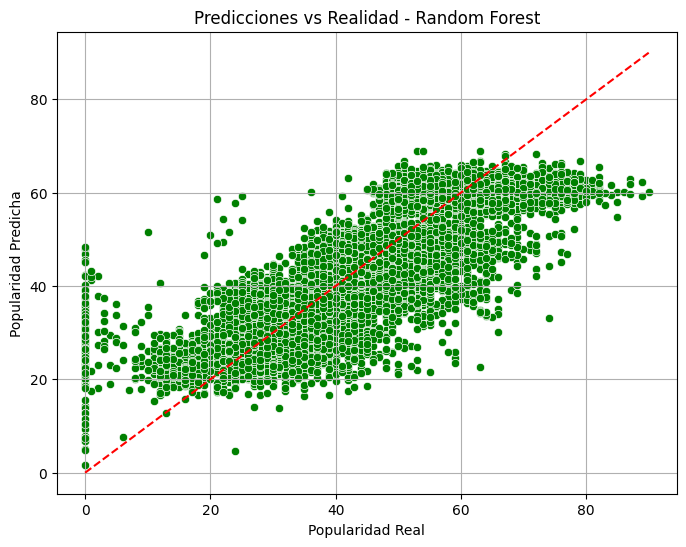

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.title("Predicciones vs Realidad - Random Forest")
plt.grid(True)
plt.show()